In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#1階と2階の面積の融合
df_train['FlrSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
#築年数の計算
df_train['BuiltYear'] = 2018 - df_train['YearRemodAdd']

In [4]:
del df_train['1stFlrSF']
del df_train['2ndFlrSF']

In [5]:
df1_train = df_train.loc[:,['OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','FlrSF']]

In [6]:
y = df_train.loc[:, ['SalePrice']]

In [7]:
from sklearn.model_selection import train_test_split
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(df_train,y,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)

In [8]:
df_train.isnull().sum()[df_train.isnull().sum()>0] #欠損値確認

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
data1 = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
data1

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [10]:
df_train = df_train.drop((data1[data1['Percent']>0.4]).index,1)

In [11]:
df_train.shape

(1460, 76)

In [12]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FlrSF,BuiltYear
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,1710,15
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,1262,42
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,1786,16
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,1717,48
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,2198,18
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,700,10,2009,WD,Normal,143000,1362,23
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,307000,1694,13
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,350,11,2009,WD,Normal,200000,2090,45
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2008,WD,Abnorml,129900,1774,68
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,1,2008,WD,Normal,118000,1077,68


In [13]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch',

In [14]:
moji = df_train.loc[:,['MSZoning','Street','LotShape','Utilities','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual','Foundation','BsmtExposure','BsmtFinType2','Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual','Functional','GarageType','GarageQual',
                        'GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition'




]]

In [15]:
moji

,MSZoning,Street,LotShape,Utilities,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,TA,RFn,TA,Y,WD,Normal
1,RL,Pave,Reg,AllPub,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,Attchd,TA,RFn,TA,Y,WD,Normal
2,RL,Pave,IR1,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,TA,RFn,TA,Y,WD,Normal
3,RL,Pave,IR1,AllPub,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Detchd,TA,Unf,TA,Y,WD,Abnorml
4,RL,Pave,IR1,AllPub,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,TA,RFn,TA,Y,WD,Normal
5,RL,Pave,IR1,AllPub,Inside,Mitchel,Norm,1Fam,1.5Fin,Gable,...,SBrkr,TA,Typ,Attchd,TA,Unf,TA,Y,WD,Normal
6,RL,Pave,Reg,AllPub,Inside,Somerst,Norm,1Fam,1Story,Gable,...,SBrkr,Gd,Typ,Attchd,TA,RFn,TA,Y,WD,Normal
7,RL,Pave,IR1,AllPub,Corner,NWAmes,PosN,1Fam,2Story,Gable,...,SBrkr,TA,Typ,Attchd,TA,RFn,TA,Y,WD,Normal
8,RM,Pave,Reg,AllPub,Inside,OldTown,Artery,1Fam,1.5Fin,Gable,...,FuseF,TA,Min1,Detchd,Fa,Unf,TA,Y,WD,Abnorml
9,RL,Pave,Reg,AllPub,Corner,BrkSide,Artery,2fmCon,1.5Unf,Gable,...,SBrkr,TA,Typ,Attchd,Gd,RFn,TA,Y,WD,Normal


In [16]:
moji.shape

(1460, 31)

In [17]:
df_num = df_train.drop(['LandSlope','BsmtFinType1','BsmtCond','BsmtQual','ExterCond','LandContour','LandSlope','Condition2','MSZoning','Street','LotShape','Utilities','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual','Foundation','BsmtExposure','BsmtFinType2','Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual','Functional','GarageType','GarageQual',
                        'GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition'],axis=1)

In [18]:
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FlrSF,BuiltYear
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1710,15
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1262,42
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1786,16
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1717,48
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,2198,18
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,320,0,0,700,10,2009,143000,1362,23
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,8,2007,307000,1694,13
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,228,0,0,0,350,11,2009,200000,2090,45
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,205,0,0,0,0,4,2008,129900,1774,68
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,1,2008,118000,1077,68


In [19]:
del df_num['GarageYrBlt']

In [20]:
df1_num = df_num.fillna(0)

In [21]:
del df1_num['SalePrice']

In [22]:
from sklearn.model_selection import train_test_split
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(df1_num,y,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)

In [23]:
rfc_2.fit(X_2_train,y_2_train)

C:\Users\Arisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
importances = rfc_2.feature_importances_
np.sort(importances)

array([0.00062571, 0.00293317, 0.00348986, 0.00373727, 0.00543453,
       0.00688949, 0.00973254, 0.01120746, 0.01162772, 0.01183483,
       0.01366349, 0.01418998, 0.01527248, 0.01606785, 0.01986812,
       0.02214146, 0.02436632, 0.02703443, 0.02846768, 0.0294032 ,
       0.0309763 , 0.03287872, 0.03378456, 0.03799152, 0.03891297,
       0.04153165, 0.04213108, 0.04544868, 0.04593372, 0.04980502,
       0.05099222, 0.05217098, 0.05244322, 0.05393745, 0.05565673,
       0.05741759])

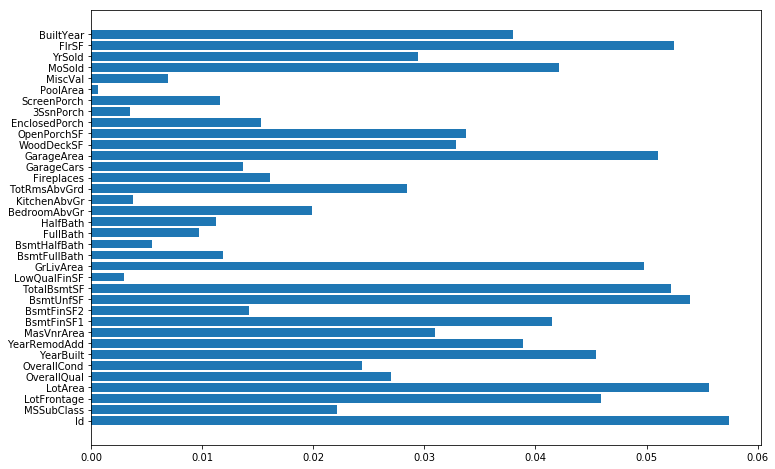

In [25]:
n_features = len(df1_num.columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), importances , align='center')
plt.yticks(np.arange(n_features), df1_num.columns)
plt.show()

In [26]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
GarageType        object


In [27]:
corr = df_train.corr()
corr.sort_values(["SalePrice"],ascending=False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
FlrSF            0.716883
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
BuiltYear       -0.507101
Name: SalePr

In [28]:
categorical_features = df_train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
numerical_features = df_train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop("SalePrice")

In [30]:
num_train = df_train[numerical_features]
cat_train = df_train[categorical_features]

In [31]:
num_train.isnull().sum()[num_train.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [32]:
#正規分布の歪みの計算
from scipy.stats import skew
skewness = num_train.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
GrLivArea         1.365156
FlrSF             1.329103
BsmtUnfSF         0.919323
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
BuiltYear         0.503044
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
GarageYrBlt            NaN
d

In [33]:
skewness = skewness[abs(skewness)>0.5]
skew_features = df_train[skewness.index]
skew_features.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'FlrSF', 'BuiltYear'],
      dtype='object')

In [34]:
#fof log変換で特徴量の歪度を扱う
skew_features = np.log1p(skew_features)

In [35]:
cat_train.shape

(1460, 38)

In [36]:
cat_train = pd.get_dummies(cat_train)
cat_train.shape

(1460, 234)

In [37]:
cat_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train = pd.concat([cat_train,num_train],axis=1)
train.shape

(1460, 271)

In [40]:
train = train.fillna(0)
del train['GarageYrBlt']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=0)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 270), (438, 270), (1022, 1), (438, 1))

In [43]:
X_train.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,FlrSF,BuiltYear
64,0,0,0,1,0,0,1,0,0,0,...,36,0,0,0,0,0,2,2009,2034,20
682,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,11,2008,1291,21
960,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,2,2010,858,10


In [52]:
train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,FlrSF,BuiltYear
0,0,0,0,1,0,0,1,0,0,0,...,61,0,0,0,0,0,2,2008,1710,15
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,5,2007,1262,42
2,0,0,0,1,0,0,1,1,0,0,...,42,0,0,0,0,0,9,2008,1786,16
3,0,0,0,1,0,0,1,1,0,0,...,35,272,0,0,0,0,2,2006,1717,48
4,0,0,0,1,0,0,1,1,0,0,...,84,0,0,0,0,0,12,2008,2198,18
5,0,0,0,1,0,0,1,1,0,0,...,30,0,320,0,0,700,10,2009,1362,23
6,0,0,0,1,0,0,1,0,0,0,...,57,0,0,0,0,0,8,2007,1694,13
7,0,0,0,1,0,0,1,1,0,0,...,204,228,0,0,0,350,11,2009,2090,45
8,0,0,0,0,1,0,1,0,0,0,...,0,205,0,0,0,0,4,2008,1774,68
9,0,0,0,1,0,0,1,0,0,0,...,4,0,0,0,0,0,1,2008,1077,68


0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
11       9
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
29       4
        ..
1430     5
1431     6
1432     4
1433     6
1434     5
1435     6
1436     4
1437     8
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1453     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1460, dtype: int64

In [57]:
train_ID = train['Id']
test_ID = df_test['Id']

train.drop("Id",axis=1,inplace=True)
df_test.drop("Id",axis=1,inplace=True)

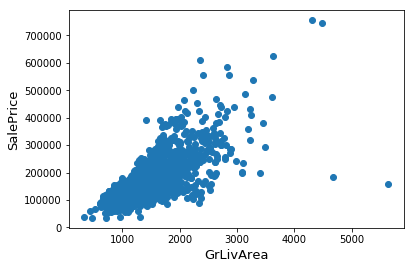

In [59]:
ig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = y['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [62]:
train = train.drop(train[(train['GrLivArea']>4000) & (y['SalePrice']<300000)].index)

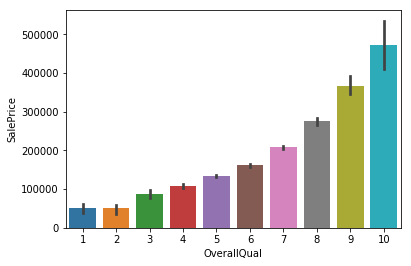

In [65]:
sns.barplot(train.OverallQual,y.SalePrice)